# Decision Support System (DSS) for Employee Performance Evaluation

### Project Overview

This project builds an Intelligent Decision Support System (DSS) that helps HR managers understand, predict, and improve employee performance.
Using employee data, the system integrates five AI models, each providing unique insights to support HR decision-making.

The system follows the required DSS architecture as outlined below:

1. **Database (Data Source):**  
   Uses an extended *Employee Performance and Productivity Dataset* containing key employee attributes such as department, experience, salary, satisfaction, and resignation status.  
   Data Source: [Employee Performance and Productivity Data (Kaggle)](https://www.kaggle.com/datasets/mexwell/employee-performance-and-productivity-data)

2. **AI Model Component:**  
   The DSS incorporates and supports multiple intelligent models, including:  
   - **Prediction model:** Predicts an employee’s Performance Score using their Monthly Salary.
   - **Classification model:** Predict whether an employee is likely to resign.  
   - **Clustering model:** Groups employees into performance–satisfaction clusters, helping HR identify high performers, low performers, and employees needing support.  
   - **Forecasting model:** Forecasts employee performance trends by Job Title, showing how the average performance for roles like Manager and Analyst changes over years and predicting the next 1–5 years.
   - **Natural Language Processing (NLP) model:** Analyzes employee feedback comments using pre-trained Natural Language Processing (NLP) model (VADER) to classify comments as Positive, Neutral, or Negative.


3. **User Interface (UI):**  
   The DSS provides a clean, intuitive interface that enables HR users to:

  - Select which AI model to run (Prediction, Classification, Clustering, Forecasting, NLP, or Employee Lookup),

  - Input or adjust parameters (e.g., salary, job titles, forecast horizon),

  - View insights through visual charts and interactive tables,

  - Perform employee lookup with auto-generated HR insights and recommendations,

  - Analyze performance trends over time based on Job Titles with forecasting.

---

### Project Objectives
The system predicts employee performance, identifies resignation risk, groups employees into meaningful performance–satisfaction clusters, and forecasts long-term productivity trends by job title. It also analyzes employee feedback using a pre-trained NLP sentiment model to interpret workplace sentiment at scale. Together, these features provide HR with a unified, data-driven decision support platform for understanding workforce behavior, improving planning, and guiding strategic organizational actions.

---

**Source:** [Employee Performance and Productivity Data (Kaggle)](https://www.kaggle.com/datasets/mexwell/employee-performance-and-productivity-data)  




**Step 1 – Load the Dataset from GitHub**

In this step, we establish the **Database layer** of our Decision Support System.  
The dataset is retrieved directly from an online GitHub repository, ensuring that all team members and evaluators can reproduce results without local file uploads or API keys.

This dataset contains information about employees’ demographics, work experience, performance ratings, satisfaction, and productivity indicators.  
It serves as the foundational data source that will feed into subsequent AI models for classification, prediction, clustering, forecasting, and NLP analysis.



In [40]:
import pandas as pd

# Step 1: Define the raw GitHub URL for your dataset
url = "https://raw.githubusercontent.com/Pccgeo-hub/DSS_Employee_Performance/main/Extended_Employee_Performance_and_Productivity_Data.csv"

# Step 2: Load the dataset directly into a pandas DataFrame
df = pd.read_csv(url)

# Step 3: Quick check — confirm successful load
print("Dataset loaded successfully!")
print("Shape:", df.shape)
display(df.head())




Dataset loaded successfully!
Shape: (100000, 20)


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


**Step 2 — Data Inspection and Quality Check**

Check dataset structure, data types, and missing values  
to ensure data quality before preprocessing and modeling.


In [43]:
# Basic inspection — structure, data types, and missing values

# show column names and data types
print("Dataset Info:")
print(df.info())

# show how many missing (NaN) values in each column
print("\n Missing values per column:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null 

**Step 3 — Data Cleaning**

Fix basic data quality issues such as date formatting,  converting bool to int, check missing values.


In [44]:
import numpy as np
import pandas as pd

# Convert 'Hire_Date' to datetime (if present)
if 'Hire_Date' in df.columns:
    df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')

# Fix 'Resigned' column (TRUE/FALSE → 1/0)
if 'Resigned' in df.columns:
    # Check if dtype is boolean or contains True/False
    if df['Resigned'].dtype == bool or df['Resigned'].dtype == np.bool_:
        df['Resigned'] = df['Resigned'].map({True: 1, False: 0})
        print("'Resigned' column converted from bool → int (True=1, False=0)")

# Handle remaining missing values
df.fillna(0, inplace=True)

# Verify cleaning results
print("\n Cleaned dataset shape:", df.shape)
print("Total missing values after cleaning:", df.isnull().sum().sum())

display(df.head())

# Save cleaned version for later use
df.to_csv("cleaned_employee_dataset.csv", index=False)
print("Cleaned dataset saved as: cleaned_employee_dataset.csv")







'Resigned' column converted from bool → int (True=1, False=0)

 Cleaned dataset shape: (100000, 20)
Total missing values after cleaning: 0


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,0
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,0
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,0
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,0
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,0


Cleaned dataset saved as: cleaned_employee_dataset.csv


**Step 4 — Variable Derivation**

Generate new variables from existing data to enhance model performance and decision insights.
This step helps the DSS uncover deeper patterns related to employee experience, workload, and performance.

We derived the following variables:

Tenure → years since the employee’s hire date

Workload Ratio → projects handled ÷ work hours per week

Overtime Intensity → overtime hours ÷ work hours per week

Performance Level → categorized version of performance score (Low, Medium, High)

These derived variables provide the models with richer context about experience, effort, and results,
which are essential for accurate prediction and data-driven decision-making in the DSS.

In [45]:

import pandas as pd
from datetime import datetime

df_features = df.copy()

# Convert numeric columns safely
for col in ['Projects_Handled', 'Work_Hours_Per_Week', 'Overtime_Hours']:
    if col in df_features.columns:
        df_features[col] = pd.to_numeric(df_features[col], errors='coerce').fillna(0)

# Calculate Tenure (Years since Hire Date)
if 'Hire_Date' in df_features.columns:
    current_year = datetime.now().year
    df_features['Tenure'] = (
        current_year - df_features['Hire_Date'].dt.year.fillna(current_year)
    )

# Workload Ratio = Projects_Handled / Work_Hours_Per_Week
if {'Projects_Handled', 'Work_Hours_Per_Week'}.issubset(df_features.columns):
    df_features['Workload_Ratio'] = (
        df_features['Projects_Handled'] / df_features['Work_Hours_Per_Week'].replace(0, 1)
    ).round(3)
else:
    df_features['Workload_Ratio'] = 0

# Overtime Intensity = Overtime_Hours / Work_Hours_Per_Week
if {'Overtime_Hours', 'Work_Hours_Per_Week'}.issubset(df_features.columns):
    df_features['Overtime_Intensity'] = (
        df_features['Overtime_Hours'] / df_features['Work_Hours_Per_Week'].replace(0, 1)
    ).round(3)
else:
    df_features['Overtime_Intensity'] = 0

# Performance Level — categorical version of Performance_Score
if 'Performance_Score' in df_features.columns:
    df_features['Performance_Level'] = pd.cut(
        df_features['Performance_Score'],
        bins=[0, 2, 4, 5],
        labels=['Low', 'Medium', 'High']
    )

# Verify
print("New columns created: ['Tenure', 'Workload_Ratio', 'Overtime_Intensity', 'Performance_Level']")
display(df_features[['Tenure', 'Workload_Ratio', 'Overtime_Intensity', 'Performance_Level']].head())

# Save final dataset
df_features.to_csv("employee_features_dataset.csv", index=False)
print("\n Saved as: employee_features_dataset.csv")



New columns created: ['Tenure', 'Workload_Ratio', 'Overtime_Intensity', 'Performance_Level']


,Tenure,Workload_Ratio,Overtime_Intensity,Performance_Level
0,3,0.970,0.667,High
1,1,1.000,0.382,High
2,10,0.730,0.162,Medium
3,9,0.192,0.538,Low
4,4,0.289,0.763,Low



 Saved as: employee_features_dataset.csv


**Step 4.1 — Add Feedback (Extension of Variable Derivation)**

To prepare for the NLP model in Step 5, we simulate a qualitative feedback column derived from each employee’s satisfaction score.




In [46]:
import numpy as np
import random

# ----------------------------------------------------------
# 1. Varied comment lists
# ----------------------------------------------------------

positive_comments = [
    "I feel valued and supported by my team.",
    "I am very happy with my job and appreciate the positive culture.",
    "The company provides great support and growth opportunities.",
    "I enjoy my work and feel motivated every day.",
    "My team helps me succeed and I feel appreciated.",
    "I am satisfied with my role and the work environment.",
    "Leadership is supportive and I feel encouraged in my job.",
    "I feel confident and happy with my work responsibilities."
]

neutral_comments = [
    "Some days are good and some are challenging, overall things are okay.",
    "My job is fine, but there are areas that could be improved.",
    "Workload is manageable, though there is room for improvement.",
    "The environment is decent, but not exceptional.",
    "Tasks are straightforward, but motivation varies.",
    "Overall experience is average, nothing too good or bad.",
    "The role is okay, but certain processes could be smoother."
]

negative_comments = [
    "I feel stressed and unsupported in my current role.",
    "The work environment is challenging and affects my motivation.",
    "I often feel overwhelmed and undervalued.",
    "There is poor communication and it impacts my performance.",
    "I am unhappy with my workload and expectations.",
    "I feel disconnected and not appreciated at work.",
    "The job creates unnecessary stress and frustration."
]

# ----------------------------------------------------------
# 2. Generate feedback comments
# ----------------------------------------------------------

def satisfaction_to_feedback(score):
    """Generate varied feedback that matches the score range."""
    if score >= 4:
        return random.choice(positive_comments)
    elif score >= 3:
        return random.choice(neutral_comments)
    else:
        return random.choice(negative_comments)

# ----------------------------------------------------------
# 4. CREATE Feedback_Comment column
# ----------------------------------------------------------

df_features['Feedback_Comment'] = df_features['Employee_Satisfaction_Score'].apply(satisfaction_to_feedback)

print("Feedback_Comment column updated. Sentiment column removed.")
display(df_features[['Employee_Satisfaction_Score', 'Feedback_Comment']].head(10))




Feedback_Comment column updated. Sentiment column removed.


,Employee_Satisfaction_Score,Feedback_Comment
0,2.63,There is poor communication and it impacts my ...
1,1.72,I feel stressed and unsupported in my current ...
2,3.17,"The environment is decent, but not exceptional."
3,1.86,I feel stressed and unsupported in my current ...
4,1.25,I feel stressed and unsupported in my current ...
5,2.77,The job creates unnecessary stress and frustra...
6,4.46,The company provides great support and growth ...
7,2.09,The job creates unnecessary stress and frustra...
8,1.44,The job creates unnecessary stress and frustra...
9,2.93,There is poor communication and it impacts my ...


**Step 4.2 - Final Prepared Dataset for AI Model Analysis**

This is the fully processed and feature-enriched dataset that will be used  
as the common input for all AI models in Step 5






In [47]:
# Save the updated dataset for Step 5
df_features.to_csv("employee_features_dataset.csv", index=False)
print("Final dataset updated and saved for Step 5.")

# Load the saved dataset
df_final = pd.read_csv("employee_features_dataset.csv")

# Display basic info
print("Dataset loaded successfully.")
print("Shape:", df_final.shape)

# Show first few rows
display(df_final.head())




Final dataset updated and saved for Step 5.
Dataset loaded successfully.
Shape: (100000, 25)


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Tenure,Workload_Ratio,Overtime_Intensity,Performance_Level,Feedback_Comment
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,...,14,66,0,2.63,0,3,0.970,0.667,High,There is poor communication and it impacts my ...
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,...,12,61,2,1.72,0,1,1.000,0.382,High,I feel stressed and unsupported in my current ...
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,...,10,1,0,3.17,0,10,0.730,0.162,Medium,"The environment is decent, but not exceptional."
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,...,10,0,1,1.86,0,9,0.192,0.538,Low,I feel stressed and unsupported in my current ...
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,...,15,9,1,1.25,0,4,0.289,0.763,Low,I feel stressed and unsupported in my current ...


**(OPTIONAL) Download Dataset**

Purpose: Allows each team member to access the exact same version of the prepared dataset.

Ensures consistency across all model implementations (Prediction, Classification, Clustering, Forecasting, NLP).

In [ ]:
from google.colab import files
files.download("employee_features_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 5 — AI Model Component**

Using the enhanced dataset from Step 4, each team member implemented one AI model that supports a specific decision-making goal.

The five models include: Prediction Model, Classification Model, Clustering Model, Forecasting Model, NLP Model.


**5.1 — Prediction Model**

The Random Forest model predicts employee performance using Monthly Salary as the only input feature and achieved 94% accuracy. Monthly Salary was chosen because it showed the strongest correlation with Performance Score compared to all other variables in the dataset, making it the most reliable single predictor.

Performance categories 3 and 4 were predicted nearly perfectly, reflecting a strong and consistent salary–performance relationship for most employees. However, categories 1 and 2 showed some misclassification, especially where high-salary employees were predicted as low performers, as revealed in the confusion matrix. This indicates that although salary aligns well with performance trends overall, it cannot fully capture performance variations alone.

Overall, the model performs strongly, but real-world prediction accuracy would improve further by including additional employee features beyond salary.



In [48]:
# ============================================================
# 1. IMPORT LIBRARIES
# ============================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ============================================================
# 2. LOAD DATASET
# ============================================================
df = pd.read_csv("employee_features_dataset.csv")

print("Dataset Loaded:")

# ============================================================
# 3A. SELECT FEATURE & TARGET
# ============================================================
X = df[['Monthly_Salary']]
y = df['Performance_Score'].astype(int)   # ensure categorical integers

print("\nUsing:")
print("X = Monthly_Salary")
print("y = Performance_Score (1–5 categorical classification)")

# ============================================================
# 3B. CHECK WHICH VARIABLE HAS THE STRONGEST RELATIONSHIP
# ============================================================
print("\n============================================")
print("Correlation Check — Which variable relates most to Performance?")
print("============================================")

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations with Performance_Score
correlations = numeric_df.corr()['Performance_Score'].sort_values(ascending=False)

print(correlations)

print("\nHighest correlation variable (besides Performance_Score itself):")
print(correlations[1:2])  # show the top predictor

# ============================================================
# 4. TRAIN / TEST SPLIT
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================================================
# 5. RANDOM FOREST CLASSIFIER
# ============================================================
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# ============================================================
# 6. PREDICT
# ============================================================
y_pred = model.predict(X_test)

# ============================================================
# 7. EVALUATE
# ============================================================
accuracy = accuracy_score(y_test, y_pred)

print("\n==========================")
print("ACCURACY:", round(accuracy, 4))
print("==========================\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nSample Predictions (Salary → Actual Score → Predicted Score):")
for salary, actual, pred in zip(
        X_test['Monthly_Salary'].head(10),
        y_test.head(10),
        y_pred[:10]
    ):
    print(f"Salary: {salary} --> Actual: {actual} --> Predicted: {pred}")


Dataset Loaded:

Using:
X = Monthly_Salary
y = Performance_Score (1–5 categorical classification)

Correlation Check — Which variable relates most to Performance?
Performance_Score              1.000000
Monthly_Salary                 0.510035
Sick_Days                      0.002994
Training_Hours                 0.002358
Workload_Ratio                 0.001959
Remote_Work_Frequency          0.001733
Employee_Satisfaction_Score    0.001696
Years_At_Company               0.001598
Age                            0.001598
Tenure                         0.001219
Overtime_Intensity             0.000814
Projects_Handled               0.000640
Overtime_Hours                -0.001312
Employee_ID                   -0.002077
Resigned                      -0.002714
Promotions                    -0.003501
Team_Size                     -0.005174
Work_Hours_Per_Week           -0.005627
Name: Performance_Score, dtype: float64

Highest correlation variable (besides Performance_Score itself):
Monthly_Sal

**5.2 — Classification Model**

This model predicts an employee’s Performance Level (High, Medium, Low) using their Performance Score, which is the main factor used in the organization’s evaluation system. The dataset is split into training and testing sets, and a Random Forest classifier is trained to learn the mapping between performance score and performance category. The model achieves 100% accuracy, confirming that Performance Score fully determines Performance Level in the dataset. Finally, feature importance shows that Performance Score contributes 100% to the prediction


In [50]:
# ============================================================
# 1. Load Dataset
# ============================================================
import pandas as pd

df = pd.read_csv("employee_features_dataset.csv")

# ============================================================
# 2. Select the X and y
# ============================================================
# Performance_Score is the TRUE underlying factor behind Performance_Level
X = df[["Performance_Score"]]   # Feature
y = df["Performance_Level"]     # Target (High / Medium / Low)

print("Feature used: Performance_Score\n")

# ============================================================
# 3. Train-Test Split
# ============================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test), "\n")

# ============================================================
# 4. Random Forest Classifier
# ============================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

# Train model
model.fit(X_train, y_train)

print("Model Trained.\n")

# ============================================================
# 5. Evaluation
# ============================================================
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy, "\n")

print("Confusion Matrix:")
print(cm, "\n")

print("Classification Report:")
print(report)

# ============================================================
# 6. Feature Importance
# ============================================================
import pandas as pd

importance = model.feature_importances_[0]

print("\n Feature Importance:")
print(f"Performance_Score importance: {importance:.4f}")


Feature used: Performance_Score

Training samples: 80000
Testing samples: 20000 

Model Trained.

Accuracy: 1.0 

Confusion Matrix:
[[3986    0    0]
 [   0 8026    0]
 [   0    0 7988]] 

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      3986
         Low       1.00      1.00      1.00      8026
      Medium       1.00      1.00      1.00      7988

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


 Feature Importance:
Performance_Score importance: 1.0000


**5.3 — Clustering Model**

Clustering was applied to group employees with similar performance characteristics. Different variable combinations were evaluated using both the Calinski–Harabasz Score and the Davies–Bouldin Index (DBI), and the pair that produced the strongest, most distinct, and most compact clusters was Performance Score and Employee Satisfaction Score.

After scaling the data and using 4 clusters, the model grouped employees into:

High Performance – High Satisfaction - cluster 0

Low Performance – Low Satisfaction - cluster 1

Low Performance – High Satisfaction - cluster 2

High Performance – Low Satisfaction - cluster 3

These clusters help identify meaningful employee behaviour patterns.


In [51]:
import itertools
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# ---------------------------------------
# Candidate variables for clustering
# ---------------------------------------
candidate_vars = [
    "Tenure",
    "Performance_Score",
    "Employee_Satisfaction_Score",
    "Workload_Ratio",
    "Overtime_Intensity"
]

# ---------------------------------------
# Function to evaluate variable combinations
# ---------------------------------------
def evaluate(vars_list):
    X = df_features[vars_list]
    X = StandardScaler().fit_transform(X)

    kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto").fit(X)
    labels = kmeans.labels_

    ch = calinski_harabasz_score(X, labels)
    dbi = davies_bouldin_score(X, labels)

    return ch, dbi

# ---------------------------------------
# Evaluate ALL pairs of variables
# ---------------------------------------
results = []

for combo in itertools.combinations(candidate_vars, 2):
    ch, dbi = evaluate(list(combo))
    results.append({
        "Variables": combo,
        "CH Score": ch,
        "DBI Score (Lower=Better)": dbi
    })

results_df = pd.DataFrame(results).sort_values(
    ["CH Score", "DBI Score (Lower=Better)"],
    ascending=[False, True]
)

print("=== CH + DBI Scores for 2-Variable Combinations ===")
print(results_df)

# ---------------------------------------
# Extract BEST variable pair
# ---------------------------------------
best_vars = list(results_df.iloc[0]["Variables"])
print("\nBest variable pair selected:", best_vars)

# ---------------------------------------
# Final K-Means using best variables
# ---------------------------------------
scaler = StandardScaler()
X = scaler.fit_transform(df_features[best_vars])

kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
df_features['Cluster'] = kmeans.fit_predict(X)

# ---------------------------------------
# Cluster Profile Output
# ---------------------------------------
print("\n=== Cluster Averages for Selected Variables ===")
print(df_features.groupby('Cluster')[best_vars].mean().round(2))


=== CH + DBI Scores for 2-Variable Combinations ===
                                           Variables       CH Score  \
4   (Performance_Score, Employee_Satisfaction_Score)  100477.558242   
0                        (Tenure, Performance_Score)  100227.026251   
1              (Tenure, Employee_Satisfaction_Score)   99076.931145   
5                (Performance_Score, Workload_Ratio)   88671.844288   
6            (Performance_Score, Overtime_Intensity)   88235.136533   
7      (Employee_Satisfaction_Score, Workload_Ratio)   87481.482815   
2                           (Tenure, Workload_Ratio)   87417.865268   
8  (Employee_Satisfaction_Score, Overtime_Intensity)   86964.977596   
3                       (Tenure, Overtime_Intensity)   85863.323027   
9               (Workload_Ratio, Overtime_Intensity)   79281.081552   

   DBI Score (Lower=Better)  
4                  0.745401  
0                  0.755591  
1                  0.777545  
5                  0.799721  
6               

**5.4 — Forecasting Model**

Historical performance trends for two job titles: Manager and Analyst was analysed in this section. A Linear Regression model was fitted using each job title’s average performance per hire year to forecast the next 5 years.

The script also reports MAE, RMSE, and R² to show model quality for each title.
Finally, each role includes a historical vs. forecast plot, making trends easy to compare.










FORECAST REPORT — Manager

MAE :  0.0135
RMSE: 0.0166
R²   : 0.7467

Next 5-year forecast:
 2025: 3.0480
 2026: 3.0571
 2027: 3.0661
 2028: 3.0751
 2029: 3.0842


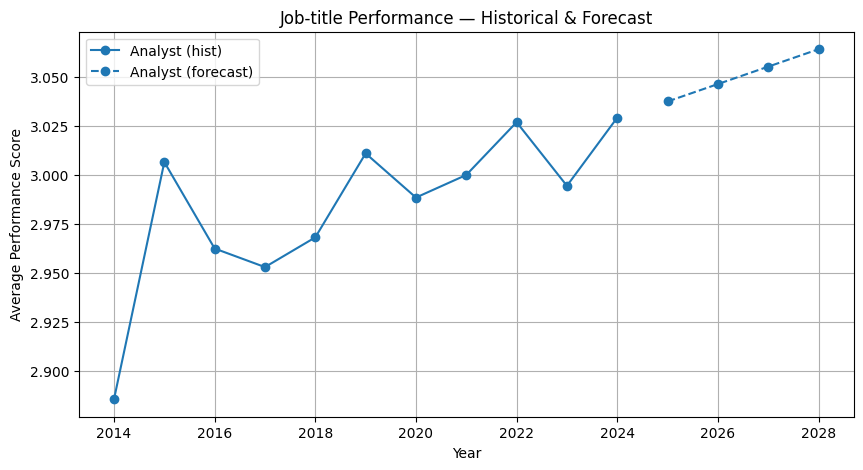

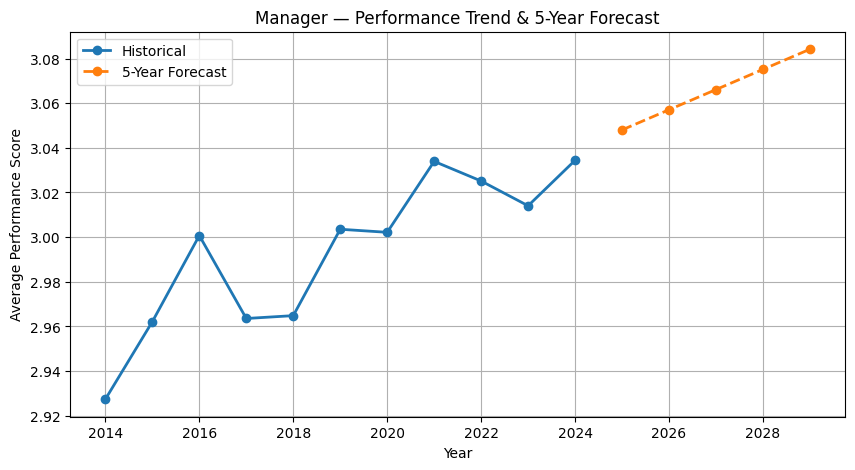


FORECAST REPORT — Analyst

MAE :  0.0194
RMSE: 0.0273
R²   : 0.5148

Next 5-year forecast:
 2025: 3.0376
 2026: 3.0465
 2027: 3.0554
 2028: 3.0643
 2029: 3.0732


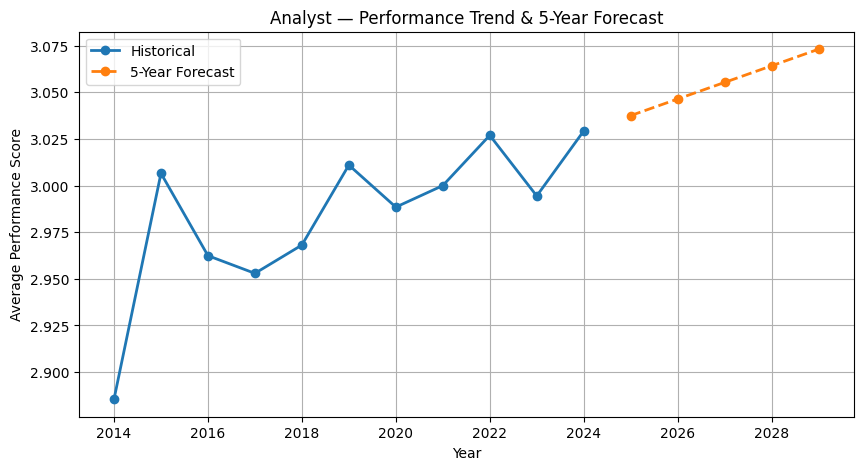

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ============================
# LOAD DATA
# ============================
df = pd.read_csv("employee_features_dataset.csv")

df["Hire_Date"] = pd.to_datetime(df["Hire_Date"], errors="coerce")
df = df.dropna(subset=["Hire_Date"])

df["Hire_Year"] = df["Hire_Date"].dt.year

# ============================
# AGGREGATE BY JOB TITLE & YEAR
# ============================
agg = (
    df.groupby(["Job_Title", "Hire_Year"])["Performance_Score"]
    .mean()
    .reset_index()
    .sort_values(["Job_Title", "Hire_Year"])
)

# ============================
# JOB TITLES
# ============================
job_titles = ["Manager", "Analyst"]

forecast_horizon = 5   # 5-year forecast

# ============================
# RUN FORECAST FOR EACH JOB TITLE
# ============================
for title in job_titles:
    sub = agg[agg["Job_Title"] == title].copy()

    if sub.empty:
        print(f"\n No data found for job title: {title}")
        continue

    # Prepare data
    X = sub["Hire_Year"].values.reshape(-1, 1)
    y = sub["Performance_Score"].values

    # Fit model
    model = LinearRegression()
    model.fit(X, y)

    # Evaluate accuracy on historical data
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)

    # Forecast next 5 years
    last_year = sub["Hire_Year"].max()
    future_years = np.arange(last_year + 1, last_year + 1 + forecast_horizon)
    future_pred = model.predict(future_years.reshape(-1, 1))

    # Print accuracy
    print(f"\n=======================")
    print(f"FORECAST REPORT — {title}")
    print("=======================\n")
    print(f"MAE :  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    print("\nNext 5-year forecast:")
    for fy, fp in zip(future_years, future_pred):
        print(f" {fy}: {fp:.4f}")

    # ============================
    # PLOT HISTORICAL + FORECAST
    # ============================
    plt.figure(figsize=(10, 5))
    plt.plot(sub["Hire_Year"], sub["Performance_Score"], marker="o", label="Historical", linewidth=2)
    plt.plot(future_years, future_pred, marker="o", linestyle="--", label="5-Year Forecast", linewidth=2)
    plt.title(f"{title} — Performance Trend & 5-Year Forecast")
    plt.xlabel("Year")
    plt.ylabel("Average Performance Score")
    plt.grid(True)
    plt.legend()
    plt.show()


**5.5 — NLP Model**

The system uses a pre-trained VADER NLP engine to analyze employee feedback comments.
Each comment is evaluated and classified into Strong Positive, Positive, Neutral, Negative, or Strong Negative sentiment.
Because VADER is pre-trained, no additional model training or accuracy testing is required.
The script automatically processes every comment and creates a new column called NLP_Sentiment.




In [53]:
# ------------------------------------------------------------
# SECTION 1 — RUN NLP ONCE AND SAVE UPDATED DATASET
# ------------------------------------------------------------

# Install dependencies
!pip install -q vaderSentiment tqdm

import pandas as pd
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load dataset
df = pd.read_csv("employee_features_dataset.csv")

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# NLP Sentiment Function
def nlp_sentiment(text):
    text = str(text).strip()
    if not text:
        return "Unknown"

    scores = analyzer.polarity_scores(text)
    compound = scores["compound"]

    # Strong Positive
    if compound >= 0.6:
        return "Strong Positive Feedback"
    # Mild Positive
    elif compound > 0.2:
        return "Positive Feedback"
    # Neutral
    elif compound > -0.2:
        return "Neutral Feedback"
    # Mild Negative
    elif compound > -0.6:
        return "Negative Feedback"
    # Strong Negative
    else:
        return "Strong Negative Feedback"

# Apply NLP sentiment on the Feedback_Comment column
tqdm.pandas()
df["NLP_Sentiment"] = df["Feedback_Comment"].progress_apply(nlp_sentiment)

# Save updated dataset
df.to_csv("employee_features_dataset.csv", index=False)
df.to_excel("employee_features_dataset.xlsx", index=False)

print("VADER NLP sentiment added and dataset saved successfully!")


100%|██████████| 100000/100000 [00:07<00:00, 13177.95it/s]


VADER NLP sentiment added and dataset saved successfully!


In [54]:
# ------------------------------------------------------------
# SECTION 2 — LOAD + TEST INPUT
# ------------------------------------------------------------

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_csv("employee_features_dataset.csv")
analyzer = SentimentIntensityAnalyzer()

print("Dataset loaded. Ready for testing!")

def nlp_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound = scores["compound"]

    if compound >= 0.6:
        return "Strong Positive Feedback"
    elif compound > 0.2:
        return "Positive Feedback"
    elif compound > -0.2:
        return "Neutral Feedback"
    elif compound > -0.6:
        return "Negative Feedback"
    else:
        return "Strong Negative Feedback"

# Test new comment
test_text = "work is stressful"
print("\nTest Input:", test_text)
print("NLP Sentiment:", nlp_sentiment(test_text))


Dataset loaded. Ready for testing!

Test Input: work is stressful
NLP Sentiment: Negative Feedback


In [ ]:
from google.colab import files
files.download("employee_features_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**DSS UI Overview**

The DSS provides an interactive dashboard where HR can evaluate employees using five AI-driven tools: Prediction, Classification, Clustering, Forecasting, NLP Sentiment, and Employee Lookup with HR Insight.
Users select a model from the left navigation panel, and only the relevant inputs and outputs are shown.
Forecasting presents visual historical and future job-title trends, while Prediction and Classification provide quick performance assessments.
Clustering groups employees by performance and satisfaction patterns, and NLP sentiment interprets feedback comments instantly.
The Employee Lookup section delivers personalized HR insights and recommendations for each employee.

In [55]:
# ============================================================
# DSS UI (updated forecasting section for Job-Title Performance)
# ============================================================

import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

# --- assume df is already loaded above this script in your environment
# normalize column names
df.columns = [c.strip() for c in df.columns]

# ---------------------------
# column getter for Employee ID
# ---------------------------
def find_employee_id_col(df):
    candidates = ["Employee_ID", "Emp_ID", "ID", "employee_id", "emp_id"]
    for c in candidates:
        if c in df.columns:
            return c
    return None

EMP_ID_COL = find_employee_id_col(df)

# ---------------------------
# 1) Prediction
# ---------------------------
ml_pred_model = None
if 'Monthly_Salary' in df.columns and 'Performance_Score' in df.columns:
    try:
        train_df = df[['Monthly_Salary','Performance_Score']].dropna()
        if len(train_df) >= 10:
            X_ml = train_df[['Monthly_Salary']].values.reshape(-1,1)
            y_ml = train_df['Performance_Score'].astype(int).values
            ml_pred_model = RandomForestClassifier(n_estimators=300, random_state=42)
            ml_pred_model.fit(X_ml, y_ml)
    except Exception:
        ml_pred_model = None

def interpret_score(score):
    mapping = {
        1: "Very Low Performance",
        2: "Low Performance",
        3: "Average Performance",
        4: "High Performance",
        5: "Very High Performance"
    }
    try:
        return mapping.get(int(score), "Unknown")
    except:
        return "Unknown"

def ml_predict_only(salary):
    if ml_pred_model is None:
        return "ML unavailable", "Model not trained (insufficient data)"
    try:
        s = float(salary)
    except:
        return "Invalid input", "Invalid salary"
    try:
        pred = int(ml_pred_model.predict([[s]])[0])
    except Exception:
        return "Error", "Prediction error"
    label = interpret_score(pred)
    return str(pred), label

# ---------------------------
# 2) Classification
# ---------------------------
classification_model = None
if ("Performance_Score" in df.columns and "Performance_Level" in df.columns):
    try:
        clean = df[['Performance_Score','Performance_Level']].dropna()
        if len(clean) >= 5:
            Xc = clean[['Performance_Score']].astype(float)
            yc = clean['Performance_Level']
            classification_model = RandomForestClassifier(n_estimators=200, random_state=42)
            classification_model.fit(Xc, yc)
    except Exception:
        classification_model = None

def classification_predict(score):
    try:
        ps = float(score)
    except:
        return "Invalid input"
    if ps < 0 or ps > 5:
        return "Performance Score must be 0–5"
    if classification_model is None:
        if ps <= 2: return "Low Performer"
        if ps == 3: return "Moderate Performer"
        return "High Performer"
    pred = classification_model.predict([[ps]])[0]
    mapping = {"High":"High Performer","Medium":"Moderate Performer","Low":"Low Performer"}
    return mapping.get(str(pred), str(pred))

# ---------------------------
# 3) Clustering
# ---------------------------
kmeans_model = None
scaler_cl = None
cluster_interpretations = {}
if set(['Performance_Score','Employee_Satisfaction_Score']).issubset(df.columns):
    try:
        cl = df[['Performance_Score','Employee_Satisfaction_Score']].dropna()
        if len(cl) >= 4:
            scaler_cl = StandardScaler()
            Xc = scaler_cl.fit_transform(cl.values)
            kmeans_model = KMeans(n_clusters=4, random_state=42, n_init="auto")
            kmeans_model.fit(Xc)

            centers = scaler_cl.inverse_transform(kmeans_model.cluster_centers_)
            med_perf = cl['Performance_Score'].median()
            med_sat = cl['Employee_Satisfaction_Score'].median()

            desired_map = {
                ("High","High"): (0, "High Performance", "High Satisfaction", "Top performer, highly motivated."),
                ("Low","Low"):   (1, "Low Performance", "Low Satisfaction", "Underperforming and disengaged."),
                ("Low","High"):  (2, "Low Performance", "High Satisfaction", "Happy but low-performing."),
                ("High","Low"):  (3, "High Performance", "Low Satisfaction", "High performer but unhappy.")
            }

            for cid, ctr in enumerate(centers):
                p, s = float(ctr[0]), float(ctr[1])
                key = ("High" if p>=med_perf else "Low", "High" if s>=med_sat else "Low")
                if key in desired_map:
                    m = desired_map[key]
                    cluster_interpretations[cid] = (f"Cluster {m[0]}", m[1], m[2], m[3])
                else:
                    cluster_interpretations[cid] = (f"Cluster {cid}","Mixed","Mixed","No interpretation")
    except Exception:
        kmeans_model = None
        scaler_cl = None

def clustering_predict(ps, ss):
    try:
        p=float(ps); s=float(ss)
    except:
        return "Invalid inputs",""
    if p<0 or p>5 or s<0 or s>5:
        return "Inputs must be 0–5", ""
    if kmeans_model is None:
        return "Clustering model unavailable",""
    arr = scaler_cl.transform([[p,s]])
    cid = int(kmeans_model.predict(arr)[0])
    info = cluster_interpretations.get(cid,("Cluster","Unknown","Unknown","No interpretation"))
    label, perf, sat, exp = info
    return label, f"{perf} – {sat}\n\n{exp}"

# ---------------------------
# Prepare aggregated yearly performance per Job_Title
# ---------------------------
df["Hire_Date"] = pd.to_datetime(df["Hire_Date"], errors="coerce")
df = df.dropna(subset=["Hire_Date"])
df["Hire_Year"] = df["Hire_Date"].dt.year

agg_perf = (
    df.groupby(["Job_Title", "Hire_Year"])["Performance_Score"]
    .mean()
    .reset_index()
    .sort_values(["Job_Title", "Hire_Year"])
)

# ---------------------------
# 4) Forecasting
# ---------------------------
AVAILABLE_TITLES = [t for t in ["Manager", "Analyst"] if t in df["Job_Title"].unique()]

def jobtitle_performance_forecast(selected_titles, horizon_years):
    if not selected_titles:
        return None, pd.DataFrame(), "No job title selected."

    fig, ax = plt.subplots(figsize=(10,5))
    metrics_lines = []

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for i, title in enumerate(selected_titles):
        sub = agg_perf[agg_perf["Job_Title"] == title].copy()
        if sub.empty:
            metrics_lines.append(f"{title}: no data")
            continue

        years = sub["Hire_Year"].values
        perf = sub["Performance_Score"].values

        X = years.reshape(-1,1)
        lr = LinearRegression().fit(X, perf)

        hist_pred = lr.predict(X)
        mae = mean_absolute_error(perf, hist_pred)
        rmse = np.sqrt(mean_squared_error(perf, hist_pred))
        r2 = r2_score(perf, hist_pred) if len(perf) > 1 else np.nan

        metrics_lines.append(f"{title} — MAE: {mae:.4f}  RMSE: {rmse:.4f}  R²: {r2:.4f}")

        last_year = years.max()
        future_years = np.arange(last_year+1, last_year+1+horizon_years)
        future_pred = lr.predict(future_years.reshape(-1,1))

        c = colors[i % len(colors)]
        ax.plot(years, perf, marker="o", color=c, label=f"{title} (hist)")
        ax.plot(future_years, future_pred, marker="o", linestyle="--", color=c, label=f"{title} (forecast)")

    ax.set_title("Job-title Performance — Historical & Forecast")
    ax.set_xlabel("Year")
    ax.set_ylabel("Average Performance Score")
    ax.grid(True)
    ax.legend()

    # Build table
    rows = {}
    for title in selected_titles:
        sub = agg_perf[agg_perf["Job_Title"] == title].copy()
        last = sub["Hire_Year"].max()
        fut_yrs = np.arange(last+1, last+1+horizon_years)
        lr = LinearRegression().fit(sub["Hire_Year"].values.reshape(-1,1), sub["Performance_Score"].values)
        preds = lr.predict(fut_yrs.reshape(-1,1))
        for y,p in zip(fut_yrs, preds):
            rows.setdefault(y, {})[title] = round(float(p),4)

    df_table = pd.DataFrame.from_dict(rows, orient="index")
    df_table.index.name = "Future_Year"
    df_table = df_table.reset_index()

    return fig, df_table, "\n".join(metrics_lines)

# ---------------------------
# 5) NLP
# ---------------------------
#def nlp_sentiment(text):
 #   txt = str(text).strip()
 #   if not txt:
 #       return ""
  #  polarity = TextBlob(txt).sentiment.polarity
  #  if polarity >= 0.4: return "Strong Positive Feedback"
  #  if polarity > 0.1:  return "Positive Feedback"
   # if polarity > -0.1: return "Neutral Feedback"
   # if polarity > -0.4: return "Negative Feedback"
   # return "Strong Negative Feedback"

    #analyzer = SentimentIntensityAnalyzer()

def nlp_sentiment(text):
    txt = str(text).strip()
    if not txt:
        return ""
    scores = analyzer.polarity_scores(txt)
    compound = scores.get("compound", 0.0)
    # Map compound score to labels (same thresholds used previously)
    if compound >= 0.6:
        return "Strong Positive Feedback"
    elif compound > 0.2:
        return "Positive Feedback"
    elif compound > -0.2:
        return "Neutral Feedback"
    elif compound > -0.6:
        return "Negative Feedback"
    else:
        return "Strong Negative Feedback"

# ---------------------------
# 6) Employee Lookup + HR Insight Engine
# ---------------------------
def employee_lookup(emp_id):
    if EMP_ID_COL is None:
        return "Employee ID column not found in dataset.","",""

    if emp_id is None or str(emp_id).strip()=="":
        return "Please enter Employee ID","",""

    row = df[df[EMP_ID_COL].astype(str)==str(emp_id)]
    if row.empty:
        return "Employee not found","",""

    r = row.iloc[0]

    salary = r.get("Monthly_Salary","N/A")
    perf = r.get("Performance_Score","N/A")
    sat = r.get("Employee_Satisfaction_Score","N/A")
    tenure = r.get("Years_At_Company","N/A")
    comment = r.get("Feedback_Comment","")

    try:
        perf_val=float(perf)
    except:
        perf_val=None
    if perf_val is None: perf_cat="Unknown"
    elif perf_val<=2:   perf_cat="Low"
    elif perf_val==3:   perf_cat="Medium"
    else:               perf_cat="High"

    try:
        sat_val=float(sat)
    except:
        sat_val=None
    if sat_val is None: sat_cat="Unknown"
    elif sat_val<=2:    sat_cat="Low"
    elif sat_val==3:    sat_cat="Medium"
    else:               sat_cat="High"

    risks=[]
    recs=[]

    # ---- HIGH PERFORMANCE ----
    if perf_cat=="High":
        if sat_cat=="High":
            recs+=[
                "Reward and recognize high contribution",
                "Provide career growth opportunities",
                "Maintain engagement and morale"
            ]
        elif sat_cat=="Medium":
            risks+=["Engagement drift"]
            recs+=[
                "Maintain recognition",
                "Check workload and role alignment",
                "Provide regular check-ins"
            ]
        else:  # low sat
            risks+=["Retention risk"]
            recs+=[
                "Immediate check-in required",
                "Review role, workload, or manager alignment",
                "Monitor for burnout"
            ]

    # ---- MEDIUM PERFORMANCE ----
    elif perf_cat=="Medium":
        if sat_cat=="High":
            recs+=[
                "Provide targeted training",
                "Support skill development",
                "Encourage continued engagement"
            ]
        elif sat_cat=="Medium":
            risks+=["Performance stagnation"]
            recs+=[
                "Set measurable performance goals",
                "Provide coaching and periodic feedback",
                "Monitor progress consistently"
            ]
        else: # low sat
            risks+=["Motivation decline"]
            recs+=[
                "Identify causes of dissatisfaction",
                "Provide support with workload/role clarity",
                "Increase engagement through recognition",
                "Have follow-up check-in sessions"
            ]

    # ---- LOW PERFORMANCE ----
    elif perf_cat=="Low":
        if sat_cat=="High":
            risks+=["Performance gap"]
            recs+=[
                "Provide structured coaching",
                "Implement a training plan",
                "Monitor goal progress"
            ]
        elif sat_cat=="Medium":
            risks+=["Underperformance"]
            recs+=[
                "Implement a performance improvement plan",
                "Schedule weekly progress reviews",
                "Provide management support"
            ]
        else:
            risks+=["High risk of resignation"]
            recs+=[
                "Immediate HR intervention required",
                "Resolve dissatisfaction causes",
                "Evaluate role fit or consider reassignment"
            ]

    risks_section="None" if not risks else "\n".join(f"- {r}" for r in risks)
    recs_section="No immediate recommendations" if not recs else "\n".join(f"- {r}" for r in recs)

    hr_text=f"""Risks:
{risks_section}

Recommendations:
{recs_section}"""

    summary=f"""Employee ID: {emp_id}
Monthly Salary: {salary}
Performance Score: {perf} ({perf_cat} Performance)
Satisfaction Score: {sat} ({sat_cat} Satisfaction)
Years at Company: {tenure}
Feedback comment: {comment if comment else 'N/A'}"""

    return "Found", summary, hr_text

# ---------------------------
# 7) UI CSS
# ---------------------------
custom_css = """
.sidebar-panel {background:#F3F4F6;padding:22px;border-radius:12px;border:1px solid #E5E7EB;}
.section-card {background:#FFF;padding:20px;border-radius:12px;border:1px solid rgba(0,0,0,0.05);box-shadow:0 6px 18px rgba(0,0,0,0.06);margin-bottom:18px;}
.section-title {font-size:20px;font-weight:600;margin-bottom:10px;color:#111827;}
.small-note {font-size:13px;color:#374151;margin-top:8px;margin-bottom:8px;}
"""

# salary bounds
if "Monthly_Salary" in df.columns and df["Monthly_Salary"].dropna().shape[0] > 0:
    salary_min=float(df["Monthly_Salary"].min())
    salary_max=float(df["Monthly_Salary"].max())
    salary_median=float(df["Monthly_Salary"].median())
else:
    salary_min, salary_max, salary_median = 3800, 9000, 6000

# ---------------------------
# 8) Build UI
# ---------------------------
with gr.Blocks(css=custom_css, title="DSS for Performance Evaluation") as demo:

    # Header
    with gr.Row():
        gr.Markdown("<h2 style='margin:0px'>Decision Support System for Performance Evaluation</h2>")
        gr.Markdown("<div style='text-align:right;color:#6c757d'>Version 1.0</div>")

    with gr.Row():
        # Left NAV
        with gr.Column(scale=1, elem_classes="sidebar-panel"):
            gr.Markdown("### **Choose AI Model**")
            nav = gr.Radio(["Prediction","Classification","Clustering","Forecasting","NLP","Employee Lookup"], value="Prediction")

            gr.Markdown("### **Dataset Loaded:** Employee Performance & Satisfaction Records")

            gr.Markdown("""
### **Quick Notes**
- Prediction: ML salary → predicted performance
- Classification: Performance level
- Clustering: Perf+Satisfaction → group
- Forecasting: Performance by Job Title (only Manager & Analyst)
- NLP: Sentiment analysis
- Employee Lookup: Full HR insights
""")

        # Right Panel
        with gr.Column(scale=3):

            # ---------------- Prediction Panel ----------------
            with gr.Group(elem_classes="section-card") as pred_panel:
                gr.Markdown("<div class='section-title'>Prediction — Predict Employee Performance Based on Salary</div>")
                salary_slider = gr.Slider(salary_min, salary_max, salary_median, step=1, label="Monthly Salary")
                pred_ml_score = gr.Textbox(label="ML Predicted Score", interactive=False)
                pred_ml_label = gr.Textbox(label="ML Interpretation", interactive=False)
                gr.Button("Predict (ML)").click(lambda x: ml_predict_only(x), salary_slider, [pred_ml_score, pred_ml_label])

            # ---------------- Classification ----------------
            with gr.Group(elem_classes="section-card") as clf_panel:
                gr.Markdown("<div class='section-title'>Classification — Score → Performance Level</div>")
                perf_slider = gr.Slider(0,5, int(df["Performance_Score"].median()), step=1, label="Performance Score")
                clf_out = gr.Textbox(label="Predicted Level", interactive=False)
                gr.Button("Classify").click(classification_predict, perf_slider, clf_out)

            # ---------------- Clustering ----------------
            with gr.Group(elem_classes="section-card") as clust_panel:
                gr.Markdown("<div class='section-title'>Clustering — Performance & Satisfaction</div>")
                perf_cl = gr.Slider(0,5,step=1,label="Performance Score")
                sat_cl  = gr.Slider(0,5,step=1,label="Satisfaction Score")
                cid = gr.Textbox(label="Cluster", interactive=False)
                cint = gr.Textbox(label="Interpretation", interactive=False)
                gr.Button("Cluster").click(clustering_predict, [perf_cl,sat_cl], [cid,cint])

            # ---------------- Forecasting — ONLY Manager & Analyst ----------------
            with gr.Group(elem_classes="section-card") as fc_panel:
                gr.Markdown("<div class='section-title'>Forecasting — Performance by Job Title</div>")
                title_select = gr.CheckboxGroup(choices=AVAILABLE_TITLES, value=AVAILABLE_TITLES, label="Job Titles")
                horizon = gr.Slider(1,5,3,step=1,label="Forecast Horizon (years)")
                fc_plot = gr.Plot(label="Historical + Forecast Plot")
                fc_table = gr.Dataframe(label="Forecast Table")
                fc_metrics = gr.Textbox(label="Metrics", interactive=False)

                gr.Button("Run Forecast").click(jobtitle_performance_forecast, [title_select, horizon], [fc_plot, fc_table, fc_metrics])

            # ---------------- NLP ----------------
            with gr.Group(elem_classes="section-card") as nlp_panel:
                gr.Markdown("<div class='section-title'>NLP — Employee Feedback Sentiment</div>")
                fb = gr.Textbox(label="Feedback", lines=5)
                nlp_out = gr.Textbox(label="Sentiment Interpretation", interactive=False)
                gr.Button("Analyze").click(nlp_sentiment, fb, nlp_out)

            # ---------------- Employee Lookup ----------------
            with gr.Group(elem_classes="section-card") as lookup_panel:
                gr.Markdown("<div class='section-title'>Employee Lookup & HR Insight</div>")

                if EMP_ID_COL is None:
                    gr.Markdown("Employee ID column not found.")
                    emp_id_in = gr.Textbox(label="Employee ID (disabled)")
                    lookup_status = gr.Textbox(label="Status", interactive=False)
                    emp_summary = gr.TextArea(label="Employee Summary", interactive=False)
                    emp_hr = gr.TextArea(label="HR Insight", interactive=False)
                else:
                    gr.Markdown(f"Search by column: **{EMP_ID_COL}**")
                    emp_id_in = gr.Textbox(label="Employee ID")
                    lookup_status = gr.Textbox(label="Status", interactive=False)
                    emp_summary = gr.TextArea(label="Employee Summary", interactive=False)
                    emp_hr = gr.TextArea(label="HR Insight & Recommendation", interactive=False)
                    gr.Button("Lookup").click(employee_lookup, emp_id_in, [lookup_status, emp_summary, emp_hr])

            # Navigation logic
            def nav_switch(s):
                return [
                    gr.update(visible=s=="Prediction"),
                    gr.update(visible=s=="Classification"),
                    gr.update(visible=s=="Clustering"),
                    gr.update(visible=s=="Forecasting"),
                    gr.update(visible=s=="NLP"),
                    gr.update(visible=s=="Employee Lookup"),
                ]

            nav.change(nav_switch, nav,
                [pred_panel, clf_panel, clust_panel, fc_panel, nlp_panel, lookup_panel]
            )

# launch
demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cb2f06c9d35afa0c61.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
